## Importando Bibliotecas usada no problema

In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report

## Ajustando configurações de plot

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [10, 5], 
          'axes.labelsize': 10,
          'axes.titlesize':14, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 8, 
          'ytick.labelsize': 8
         }
plt.rcParams.update(params)

## [5d] item a

#### $\mu_1 = [4, 7]$
#### $\mu_1 = [8, 0]$
#### $\sum_1 = \sum_2 = \sum = I =  \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}$
#### $P(\omega_1) = P(\omega_2) = \frac{1}{2} $
#### $d(X) = 
     \begin{cases}
       \omega_1, & -4x_1 + 7x_2 -0.5 > 0\\
       \omega_2 & C.C\\
     \end{cases}$

### Gerando gráfico das distribuições normais bivariadas

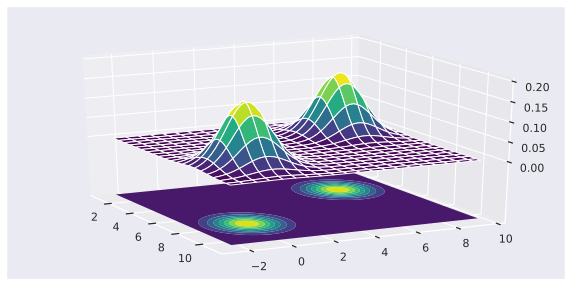

In [28]:
# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(1, 11, N)
Y = np.linspace(-2.5, 9.5, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu1 = np.array([4., 7.])
Sigma1 = np.array([[ 1. , 0.], [0.,  1.]])

# Mean vector and covariance matrix
mu2 = np.array([8., 0.])
Sigma2 = np.array([[ 1. , 0.], [0.,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu1, Sigma1) + multivariate_gaussian(pos, mu2, Sigma2)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(22, -27)

plt.show()

## Função para classificação

In [4]:
## Classificador
def bayesanClassifier(X1, X2, coef):
    results = []
    for x1, x2 in zip(X1, X2):
        value = coef[0]*x1 + coef[1]*x2 + coef[2]
        if value > 0:
            results.append(0)
        else:
            results.append(1)
    return results

## Gerando Amostras de n = 1000 para as distribuições normais bivariada

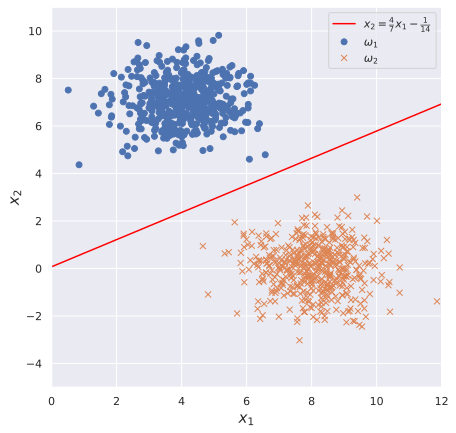

In [27]:
mean1 = [4, 7]
cov1 = [[1, 0], [0, 1]]
x, y = np.random.multivariate_normal(mean1, cov1, 500).T

mean2 = [8, 0]
cov2 = [[1, 0], [0, 1]]
w, z = np.random.multivariate_normal(mean2, cov2, 500).T

#equação da reta
x1= np.arange(-2,15,1)
x2 = (4.*x1 + 0.5)/7.

X1 = np.concatenate((x, w), axis=None)
X2 = np.concatenate((y, z), axis=None)

class1 = np.full(500, 0)
class2 = np.full(500, 1)
CLASS =  np.concatenate((class1, class2), axis=None)

coef = [-4., 7., -0.5]

plt.figure(figsize=(7,7))
plt.plot(x1,x2, color = 'red', label = r'$x_2= \frac{4}{7}x_1 -\frac{1}{14}$')
plt.plot(x, y, 'o', label = r'$\omega_1$')
plt.plot(w, z, 'x', label = r'$\omega_2$')
plt.xlabel(r'$x_{1}$', fontsize = 15)
plt.ylabel(r'$x_{2}$', fontsize = 15)
plt.xlim(0,12)
plt.ylim(-5,11)
plt.legend()
#plt.axis('equal')
plt.show()

## Função para a Classificação

In [6]:
results = bayesanClassifier(X1, X2, coef)

## Matriz de confusão

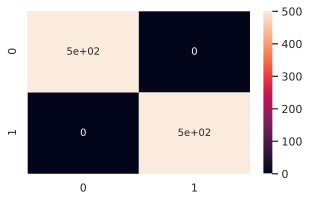

In [7]:
matrix = confusion_matrix(CLASS, results)
import seaborn as sn
df_cm = pd.DataFrame(matrix, range(2), range(2))
plt.figure(figsize=(5,3))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size

plt.show()

## Métricas

In [8]:
target_names = ['Classe 1', 'Classe 2']
##Calculando os erros
erros = 0
for i in range(0, 1000):
    if results[i] != CLASS[i]:
        erros += 1


print(classification_report(CLASS, results, target_names=target_names))
print('Erro:', ((erros)/1000)*100, '%' )

              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00       500
    Classe 2       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Erro: 0.0 %


## [5d] item b


#### $\mu_1 = [4, 7]$
#### $\mu_1 = [8, 0]$
#### $\sum_1 = \sum_2 = \sum = I =  \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}$
#### $P(\omega_1) = \frac{1}{3}$ 
#### $P(\omega_2) = \frac{2}{3} $
#### $d(X) = 
     \begin{cases}
       \omega_1, & -4x_1 + 7x_2 -1.193 > 0\\
       \omega_2 & C.C\\
     \end{cases}$

### Gerando gráfico das distribuições normais bivariadas

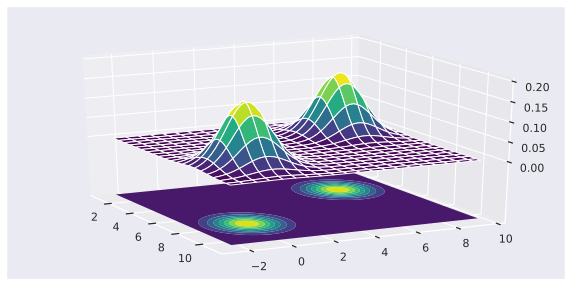

In [9]:
# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(1, 11, N)
Y = np.linspace(-2.5, 9.5, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu1 = np.array([4., 7.])
Sigma1 = np.array([[ 1. , 0.], [0.,  1.]])

# Mean vector and covariance matrix
mu2 = np.array([8., 0.])
Sigma2 = np.array([[ 1. , 0.], [0.,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu1, Sigma1) + multivariate_gaussian(pos, mu2, Sigma2)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(22, -27)

plt.show()

## Gerando Amostras de n = 1000 para as distribuições normais bivariada

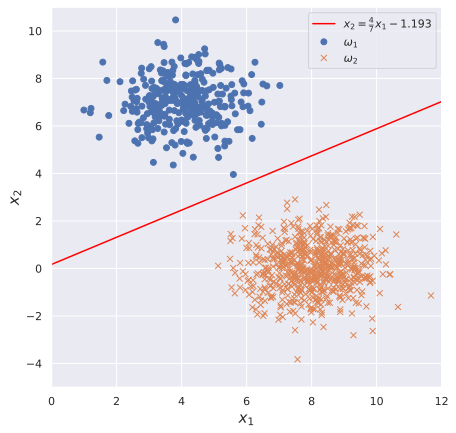

In [10]:
mean1 = [4, 7]
cov1 = [[1, 0], [0, 1]]
x, y = np.random.multivariate_normal(mean1, cov1, 333).T

mean2 = [8, 0]
cov2 = [[1, 0], [0, 1]]
w, z = np.random.multivariate_normal(mean2, cov2, 667).T

#equação da reta
x1= np.arange(-2,15,1)
x2 = (4.*x1 + 1.193)/7.

X1 = np.concatenate((x, w), axis=None)
X2 = np.concatenate((y, z), axis=None)

class1 = np.full(333, 0)
class2 = np.full(667, 1)
CLASS =  np.concatenate((class1, class2), axis=None)

coef = [-4., 7., -1.193]

plt.figure(figsize=(7,7))
plt.plot(x1,x2, color = 'red', label = r'$x_2= \frac{4}{7}x_1 -1.193$')
plt.plot(x, y, 'o', label = r'$\omega_1$')
plt.plot(w, z, 'x', label = r'$\omega_2$')
plt.xlabel(r'$x_{1}$', fontsize = 15)
plt.ylabel(r'$x_{2}$', fontsize = 15)
plt.xlim(0,12)
plt.ylim(-5,11)
plt.legend()
#plt.axis('equal')
plt.show()

## Função para classificação

In [11]:
results = bayesanClassifier(X1, X2, coef)

## Matriz de Confusão

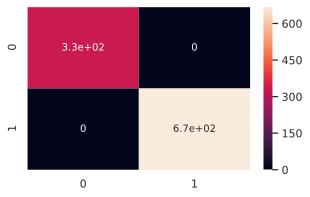

In [12]:
matrix = confusion_matrix(CLASS, results)
import seaborn as sn
df_cm = pd.DataFrame(matrix, range(2), range(2))
plt.figure(figsize=(5,3))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size

plt.show()

## Métricas

In [13]:
target_names = ['Classe 1', 'Classe 2']
##Calculando os erros
erros = 0
for i in range(0, 1000):
    if results[i] != CLASS[i]:
        erros += 1


print(classification_report(CLASS, results, target_names=target_names))
print('Erro:', ((erros)/1000)*100, '%' )

              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00       333
    Classe 2       1.00      1.00      1.00       667

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Erro: 0.0 %


## [5d] item b


#### $\mu_1 = [4, 7]$
#### $\mu_1 = [8, 0]$
#### $\sum_1 = \sum_2 = \sum =  \begin{bmatrix}
1 & \frac{1}{3} \\
\frac{1}{3} & \frac{2}{3}
\end{bmatrix}$
#### $P(\omega_1) = P(\omega_2) = \frac{1}{2} $
#### $d(X) = 
     \begin{cases}
       \omega_1, & -9x_1 + 15x_2 -1.1 > 0\\
       \omega_2 & C.C\\
     \end{cases}$

### Gerando gráfico das distribuições normais bivariadas

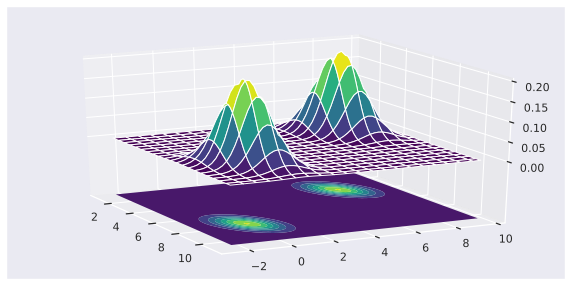

In [14]:
# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(1, 11, N)
Y = np.linspace(-2.5, 9.5, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu1 = np.array([4., 7.])
Sigma1 = np.array([[ 1. , 1/3.], [1/3.,  2/3.]])

# Mean vector and covariance matrix
mu2 = np.array([8., 0.])
Sigma2 = np.array([[ 1. , 1/3.], [1/3.,  2/3.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu1, Sigma1) + multivariate_gaussian(pos, mu2, Sigma2)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(22, -27)

plt.show()

## Gerando Amostras de n = 1000 para as distribuições normais bivariada

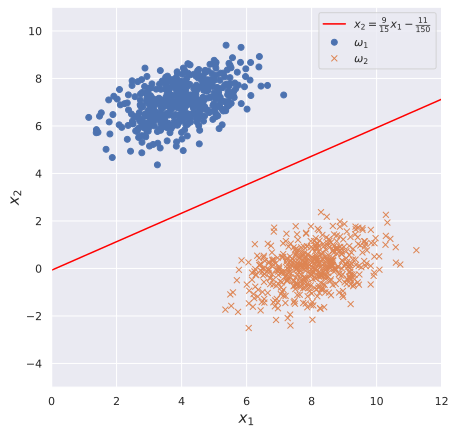

In [15]:
mean1 = [4, 7]
cov1 = [[1, 1/3.], [1/3., 2/3.]]
x, y = np.random.multivariate_normal(mean1, cov1, 500).T

mean2 = [8, 0]
cov2 = [[1, 1/3.], [1/3., 2/3.]]
w, z = np.random.multivariate_normal(mean2, cov2, 500).T

#equação da reta
x1= np.arange(-2,15,1)
x2 = (9.*x1 - 1.1)/15.

X1 = np.concatenate((x, w), axis=None)
X2 = np.concatenate((y, z), axis=None)

class1 = np.full(500, 0)
class2 = np.full(500, 1)
CLASS =  np.concatenate((class1, class2), axis=None)

coef = [-9., 15., 1.1]

plt.figure(figsize=(7,7))
plt.plot(x1,x2, color = 'red', label = r'$x_2= \frac{9}{15}x_1 -\frac{11}{150}$')
plt.plot(x, y, 'o', label = r'$\omega_1$')
plt.plot(w, z, 'x', label = r'$\omega_2$')
plt.xlabel(r'$x_{1}$', fontsize = 15)
plt.ylabel(r'$x_{2}$', fontsize = 15)
plt.xlim(0,12)
plt.ylim(-5,11)
plt.legend()
#plt.axis('equal')
plt.show()

## Função para classificação

In [16]:
results = bayesanClassifier(X1, X2, coef)

## Matrix de Confusão

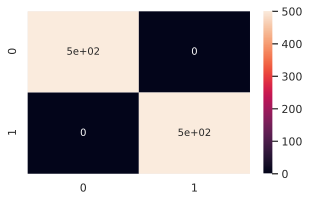

In [17]:
matrix = confusion_matrix(CLASS, results)
import seaborn as sn
df_cm = pd.DataFrame(matrix, range(2), range(2))
plt.figure(figsize=(5,3))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size

plt.show()

## Métricas

In [18]:
target_names = ['Classe 1', 'Classe 2']
##Calculando os erros
erros = 0
for i in range(0, 1000):
    if results[i] != CLASS[i]:
        erros += 1


print(classification_report(CLASS, results, target_names=target_names))
print('Erro:', ((erros)/1000)*100, '%' )

              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00       500
    Classe 2       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Erro: 0.0 %


## [5d] item b


#### $\mu_1 = [4, 7]$
#### $\mu_1 = [8, 0]$
#### $\sum_1 = \sum_2 = \sum = I =  \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}$
#### $P(\omega_1) = \frac{1}{3}$ 
#### $P(\omega_2) = \frac{2}{3} $
#### $d(X) = 
     \begin{cases}
       \omega_1, & -4x_1 + 7x_2 -0.5 > 0\\
       \omega_2 & C.C\\
     \end{cases}$

## Gerando Amostras de n = 1000 para as distribuições normais bivariada

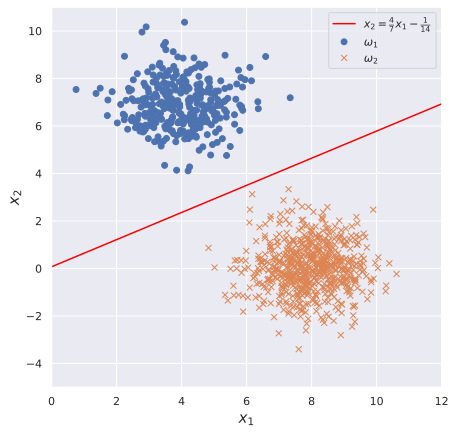

In [19]:
mean1 = [4, 7]
cov1 = [[1, 0], [0, 1]]
x, y = np.random.multivariate_normal(mean1, cov1, 333).T

mean2 = [8, 0]
cov2 = [[1, 0], [0, 1]]
w, z = np.random.multivariate_normal(mean2, cov2, 667).T

#equação da reta
x1= np.arange(-2,15,1)
x2 = (4.*x1 + 0.5)/7.

X1 = np.concatenate((x, w), axis=None)
X2 = np.concatenate((y, z), axis=None)

class1 = np.full(333, 0)
class2 = np.full(667, 1)
CLASS =  np.concatenate((class1, class2), axis=None)

coef = [-4., 7., -1.193]

plt.figure(figsize=(7,7))
plt.plot(x1,x2, color = 'red', label = r'$x_2= \frac{4}{7}x_1 -\frac{1}{14}$')
plt.plot(x, y, 'o', label = r'$\omega_1$')
plt.plot(w, z, 'x', label = r'$\omega_2$')
plt.xlabel(r'$x_{1}$', fontsize = 15)
plt.ylabel(r'$x_{2}$', fontsize = 15)
plt.xlim(0,12)
plt.ylim(-5,11)
plt.legend()
#plt.axis('equal')
plt.show()

## Função para classificação

In [20]:
results = bayesanClassifier(X1, X2, coef)

## Matriz de Confusão

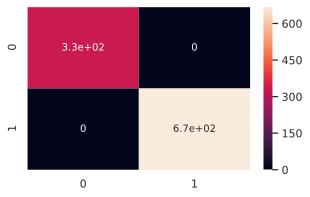

In [21]:
matrix = confusion_matrix(CLASS, results)
import seaborn as sn
df_cm = pd.DataFrame(matrix, range(2), range(2))
plt.figure(figsize=(5,3))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size

plt.show()

## Métricas

In [22]:
target_names = ['Classe 1', 'Classe 2']
##Calculando os erros
erros = 0
for i in range(0, 1000):
    if results[i] != CLASS[i]:
        erros += 1


print(classification_report(CLASS, results, target_names=target_names))
print('Erro:', ((erros)/1000)*100, '%' )

              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00       333
    Classe 2       1.00      1.00      1.00       667

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Erro: 0.0 %


## [5d] item b

#### $\mu_1 = [4, 7]$
#### $\mu_1 = [8, 0]$
#### $\sum_1 = \sum_2 = \sum = \begin{bmatrix}
1 & \frac{1}{3} \\
\frac{1}{3} & \frac{2}{3}
\end{bmatrix}$
#### $P(\omega_1) = P(\omega_2) = \frac{1}{2} $
#### $d(X) = 
     \begin{cases}
       \omega_1, & -4x_1 + 7x_2 -0.5 > 0\\
       \omega_2 & C.C\\
     \end{cases}$

## Gerando Amostras de n = 1000 para as distribuições normais bivariada

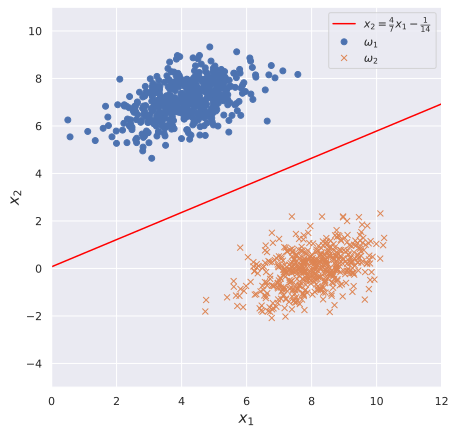

In [23]:
mean1 = [4, 7]
cov1 = [[1, 1/3.], [1/3., 2/3.]]
x, y = np.random.multivariate_normal(mean1, cov1, 500).T

mean2 = [8, 0]
cov2 = [[1, 1/3.], [1/3., 2/3.]]
w, z = np.random.multivariate_normal(mean2, cov2, 500).T

#equação da reta
x1= np.arange(-2,15,1)
x2 = (4.*x1 + 0.5)/7.

X1 = np.concatenate((x, w), axis=None)
X2 = np.concatenate((y, z), axis=None)

class1 = np.full(500, 0)
class2 = np.full(500, 1)
CLASS =  np.concatenate((class1, class2), axis=None)

coef = [-4., 7., -1.193]

plt.figure(figsize=(7,7))
plt.plot(x1,x2, color = 'red', label = r'$x_2= \frac{4}{7}x_1 -\frac{1}{14}$')
plt.plot(x, y, 'o', label = r'$\omega_1$')
plt.plot(w, z, 'x', label = r'$\omega_2$')
plt.xlabel(r'$x_{1}$', fontsize = 15)
plt.ylabel(r'$x_{2}$', fontsize = 15)
plt.xlim(0,12)
plt.ylim(-5,11)
plt.legend()
#plt.axis('equal')
plt.show()

## Função para classificação

In [24]:
results = bayesanClassifier(X1, X2, coef)

## Matriz de Confusão

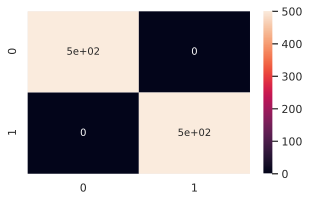

In [25]:
matrix = confusion_matrix(CLASS, results)
import seaborn as sn
df_cm = pd.DataFrame(matrix, range(2), range(2))
plt.figure(figsize=(5,3))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size

plt.show()

## Métricas

In [26]:
target_names = ['Classe 1', 'Classe 2']
##Calculando os erros
erros = 0
for i in range(0, 1000):
    if results[i] != CLASS[i]:
        erros += 1


print(classification_report(CLASS, results, target_names=target_names))
print('Erro:', ((erros)/1000)*100, '%' )

              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00       500
    Classe 2       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Erro: 0.0 %
